# Chapter 2, Example 2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import os
if not os.path.isdir('figures'):
	os.makedirs('figures')

In [2]:
# set parameters
no_epochs = 1500
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [3]:
# generate training data
X = np.random.rand(7,2)
Y = 1.0 +3.3*X[:,0]**2-2.5*X[:,1]+0.2*X[:,0]*X[:,1]
Y = Y.reshape(7,1)

print('X: %s'%X)
print('Y: %s'%Y)

X: [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]]
Y: [[ 2.91460867]
 [ 0.54786923]
 [ 1.28050142]
 [-0.74174484]
 [ 0.87651328]
 [ 0.2972698 ]
 [-0.28002476]]


In [4]:
# a class for the preceptron
class Perceptron():
  def __init__(self):
    self.w = tf.Variable(np.random.rand(2,1), dtype=tf.float64)
    self.b = tf.Variable(0., dtype=tf.float64)

  def __call__(self, x):
    u = tf.matmul(x, self.w) + self.b
    y = 4.0*tf.sigmoid(u)-1.0
    return u, y

In [5]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

In [6]:
def train(model, x, d, learning_rate):
    _, y = model(x)
    df = (y+1)*(3-y)*0.25
    grad_w = -tf.matmul(tf.transpose(x), (d - y)*df)
    grad_b = -tf.reduce_sum((d - y)*df)

    model.w.assign_sub(learning_rate * grad_w)
    model.b.assign_sub(learning_rate * grad_b)

In [7]:
model = Perceptron()
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

w: [[0.81262096]
 [0.61252607]], b: 0.0


In [8]:
# Collect the history of W-values and b-values to plot later
mse = []
for epoch in range(no_epochs):
    
    u, y_ = model(X)
    loss_ = loss(y_, Y)
  
    train(model, X, Y, learning_rate=lr)

    mse.append(loss_)
  
    if epoch < 2:
        print('epoch: {}'.format(epoch+1))
        print('y: {}'.format(y_))
        print('mse: {}'.format(loss_))
        print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

    if epoch%100 == 0:
        print('Epoch %2d:  mse=%2.5f'%(epoch, mse[-1]))

epoch: 1
y: [[1.6185639 ]
 [1.90332817]
 [1.52984579]
 [1.60704946]
 [1.19095005]
 [2.03139113]
 [1.31431287]]
mse: 2.1062811484468287
w: [[0.80013286]
 [0.56757552]], b: -0.05410600960098348
Epoch  0:  mse=2.10628
epoch: 2
y: [[1.55950887]
 [1.82554704]
 [1.46376392]
 [1.52355292]
 [1.13115615]
 [1.95184245]
 [1.23861892]]
mse: 1.963235343679713
w: [[0.78874754]
 [0.52336676]], b: -0.1053539598231078
Epoch 100:  mse=0.37797
Epoch 200:  mse=0.17711
Epoch 300:  mse=0.11159
Epoch 400:  mse=0.08377
Epoch 500:  mse=0.06961
Epoch 600:  mse=0.06147
Epoch 700:  mse=0.05639
Epoch 800:  mse=0.05304
Epoch 900:  mse=0.05075
Epoch 1000:  mse=0.04914
Epoch 1100:  mse=0.04798
Epoch 1200:  mse=0.04714
Epoch 1300:  mse=0.04653
Epoch 1400:  mse=0.04607


In [9]:
# print learned weights
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

_, pred = model(X)
print('y: %s'%pred.numpy())

final_loss = loss(pred, Y)
print('mse: %2.5f'%final_loss)

w: [[ 3.34515061]
 [-2.80052068]], b: -0.47373821318766246
y: [[ 2.54311476]
 [ 0.55636834]
 [ 1.5497831 ]
 [-0.49787863]
 [ 0.84487771]
 [ 0.19680512]
 [-0.47726909]]
mse: 0.04572


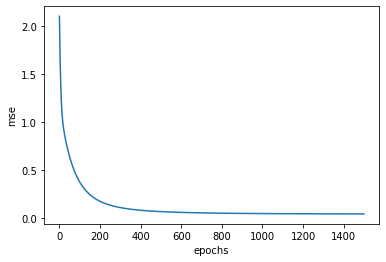

In [10]:
# plot learning curves
plt.figure(1)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mse')
plt.savefig('./figures/2.2_1.png')

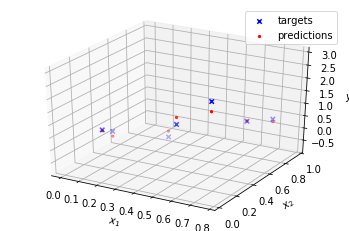

In [11]:
# plot trained and predicted points
fig = plt.figure(3)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], pred.numpy(), color='red', marker='.', label='predictions')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.legend()
plt.savefig('./figures/2.2_2.png')

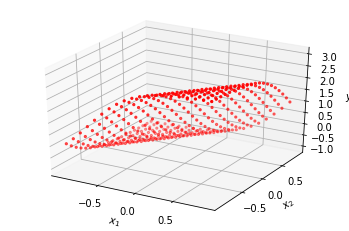

In [12]:
# Plot learned mapping
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X = []
for i in range(len(X1)):
  for j in range(len(X2)):
    X.append([X1[i], X2[j]])

X = np.array(X)
_, pred = model(X)

fig = plt.figure(4)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], pred.numpy(), color='red', marker='.', label='predictions')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
plt.savefig('./figures/2.2_3.png')